In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from        encodings.aliases import aliases

%matplotlib inline

# create a set of all available encodings
alias_values = set(aliases.values())

for enconding in set(aliases.values()):
    try:
        pd.read_csv('../data/ext-ciclovias.csv', encoding=enconding) # read only first 10 rows to save time
        print('Succeful: ', enconding)
    except:
        pass

Succeful:  cp037
Succeful:  cp500
Succeful:  cp273
Succeful:  cp1140
Succeful:  cp1026


In [5]:
import requests

# List all datasets
def get_all_datasets():
    url = "https://opendata.urbanplatform.portodigital.pt/api/3/action/package_list"
    r = requests.get(url)
    return r.json()["result"]

print(get_all_datasets())

['agua-de-nascente', 'alojamento-local', 'alojamentos-hoteleiros-2011', 'areas-edificadas', 'areas-verdes', 'atlas-desportivo', 'bairros-de-casas-economicas-do-estado-novo', 'balizas-de-sinalizacao', 'bicicletarios', 'carta-de-patrimonio', 'cemiterios-municipais-ou-privados-2007', 'centros-de-saude-e-extensoes-2001', 'ciclovias', 'correios-2013', 'dissuasores-de-controlo-de-acessos', 'ecocentros-2006', 'edificios-de-interesse-publico', 'edificios-de-interesse-publico-2012', 'eixos-de-via-infraestruturas-portugal', 'envolvente', 'equipamentos-de-recolha-contentores-cinzentos_-cones_recolha-de-objectos-fora-de-uso_-reee-e-vidroes', 'equipamentos-de-saude', 'espacos-verdes-com-valor-patrimonial-2012', 'estabelecimentos-de-bebidas-e-restauracao-da-movida-2012', 'estabelecimentos-de-ensino-por-ano-letivo', 'estabelecimentos-de-ensino-superior-por-ano-letivo', 'feiras-e-mercados-2011', 'fontes-de-contaminacao-cemiterios-carta-de-ocupacao-de-superficie', 'fontes-de-contaminacao-cemiterios-car

In [6]:
import requests

def get_dataset_info(dataset, url_only=True):
    # returns a generator for (dataset-resource, FORMAT, URL) or just the URL
    url = "https://opendata.urbanplatform.portodigital.pt/api/3/action/package_show?id=%s" % dataset
    j = requests.get(url).json()
    if not j["success"]:
        print(j["error"])
        return
    for resource in j['result']['resources']:
        if url_only:
            yield resource["url"]
        else:
            yield (resource["name"], resource["format"], resource["url"])

print(list(get_dataset_info("agua-de-nascente")))

['https://servsig.cm-porto.pt/arcgis/rest/services/OpenData_APD/OpenData_APD/MapServer/83']


In [7]:
import pandas as pd

# Assuming your CSV file is named 'data.csv'
file_path = "../data/ext-ciclovias.csv"

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path, sep=";")

# Display specific columns (replace 'column_names' with the names of columns you want to display)
print(data.columns)



Index([''toponimo','denominacao','pavimento','largura','estado','objectid','globalid','esriGeometryPolyline''], dtype='object')


In [8]:
import pandas as pd

# Assuming your CSV file is named 'data.csv'
file_path = "../data/ext-ciclovias.csv"

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path, sep=";")

# Remove extra quotes from column names
data.columns = data.columns.str.strip("'")

# Access the 'toponimo' column using iloc
toponimo_column = data.iloc[:, 0]  # Assuming 'toponimo' is the first column (index 0)

# Display the 'toponimo' column
print(toponimo_column)


0      '','Ciclovia Asprela','Betão betuminoso',0.0,'...
1      'Rua do Dr. Roberto Frias','Ciclovia Asprela',...
2      'Avenida das Congostas','Ciclovia Prelada','Be...
3      'Rua de Gonçalo Sampaio','Ligação entre Pólos ...
4      '','','',0.0,'Planeado',645,'{1B24C198-B060-46...
                             ...                        
350    '','','',0.0,'Planeado',633,'{89CC596A-347A-49...
351    '','Parque da Cidade','Saibro / terra batida',...
352    'Escadas Garcia de Orta','Ciclovia Parque Cida...
353    '','Parque Pasteleira','Múltiplo',2.5,'Executa...
354    '','Ciclovia Parque Cidade - Fluvial','Múltipl...
Name: toponimo','denominacao','pavimento','largura','estado','objectid','globalid','esriGeometryPolyline, Length: 355, dtype: object


,toponimo,denominacao,pavimento,largura,estado,objectid,globalid
0,,ciclovia asprela,betão betuminoso,0.0,executado,528,{bd4f828c-ccd0-4766-a27e-3b8757286a41}
1,rua do dr. roberto frias,ciclovia asprela,betão betuminoso,1.1,executado,437,{d0c2b68a-a0fb-46b1-9306-f851e9cc13f4}
2,avenida das congostas,ciclovia prelada,betão betuminoso,3.0,executado,376,{ee649016-3b74-4946-b488-e6198b961428}
3,rua de gonçalo sampaio,ligação entre pólos universitários,betão betuminoso,3.0,executado,502,{dae233da-9877-41b5-9098-7ac5aae384bf}
4,,,,0.0,planeado,645,{1b24c198-b060-46c6-a186-41d0d544299d}
...,...,...,...,...,...,...,...
350,,,,0.0,planeado,633,{89cc596a-347a-495a-9549-87ad15664a82}
351,,parque da cidade,saibro / terra batida,3.5,executado,578,{63b8fecb-6bf0-4a56-bb28-fc51b7ae749d}
352,escadas garcia de orta,ciclovia parque cidade - fluvial,múltiplo,2.7,executado,570,{d00aea80-c355-48c9-bc0c-6ac26506c77f}
353,,parque pasteleira,múltiplo,2.5,executado,568,{c6cc50ee-cf2a-4e7a-a447-82b67bcb77dc}


float64
toponimo        object
denominacao     object
pavimento       object
largura        float64
estado          object
                ...   
_82             object
_83             object
_84             object
_85             object
_86             object
Length: 95, dtype: object


<Axes: xlabel='largura'>

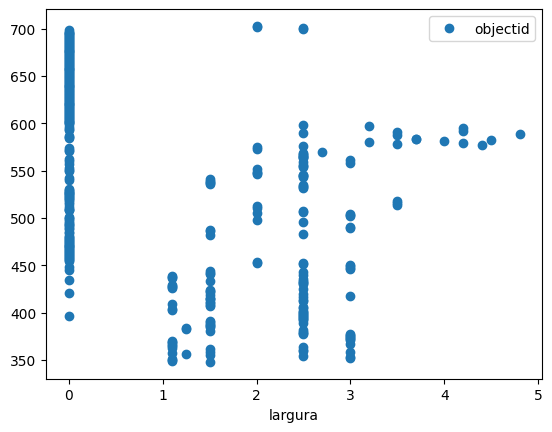

In [9]:
import pandas as pd

# Assuming your CSV file is named 'data.csv'
file_path = "../data/ext-ciclovias-formated.csv"

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path, sep=";", encoding="utf-8")

# remove ' from title column
data.columns = data.columns.str.strip("'")

# remove ' from all values
data = data.apply(lambda x: x.str.strip("'") if x.dtype == "object" else x)

# turn all values to lower case
data = data.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

# turn objectid to int
data['objectid'] = data['objectid'].astype(int)

# print more than one column toponimo','denominacao','pavimento','largura','estado','objectid','globalid','esriGeometryPolyline
display(data[['toponimo', 'denominacao', 'pavimento',
        'largura', 'estado', 'objectid', 'globalid']])

# print data type from largura
print(data['largura'].dtype)

# print values types
print(data.dtypes)

# create a graph from data
data.plot(x='largura', y='objectid', style='o')

In [10]:
import requests
import pandas as pd

url = "https://opendata.porto.digital/dataset/d23a2bca-ffe5-43d0-954a-7b5e90167289/resource/61961146-c116-4b40-83e1-f4391c6cb485/download/ext-ciclovias.csv"

# read all columns minus the last one
data = pd.read_csv(url, sep=";")

# print
display(data)

,"'toponimo','denominacao','pavimento','largura','estado','objectid','globalid','esriGeometryPolyline'"
0,"'','Ciclovia Asprela','Betão betuminoso',0.0,'..."
1,"'Rua do Dr. Roberto Frias','Ciclovia Asprela',..."
2,"'Avenida das Congostas','Ciclovia Prelada','Be..."
3,"'Rua de Gonçalo Sampaio','Ligação entre Pólos ..."
4,"'','','',0.0,'Planeado',645,'{1B24C198-B060-46..."
...,...
350,"'','','',0.0,'Planeado',633,'{89CC596A-347A-49..."
351,"'','Parque da Cidade','Saibro / terra batida',..."
352,"'Escadas Garcia de Orta','Ciclovia Parque Cida..."
353,"'','Parque Pasteleira','Múltiplo',2.5,'Executa..."


In [11]:
import csv
import pandas as pd
import requests
from io import StringIO

url = "https://opendata.porto.digital/dataset/d23a2bca-ffe5-43d0-954a-7b5e90167289/resource/61961146-c116-4b40-83e1-f4391c6cb485/download/ext-ciclovias.csv"

response = requests.get(url)
if response.status_code == 200:
    # Decode the content to a string and split lines
    decoded_content = response.content.decode('utf-8')
    lines = decoded_content.splitlines()

    # Using csv.reader to skip lines with too many fields
    data = []
    for line in csv.reader(lines):
        if len(line) == 37:  # Adjust this number according to your data
            data.append(line)

    # Convert list of lists to a pandas DataFrame
    df = pd.DataFrame(data)
    # Optionally, you might want to set column names if they are available separately

    # Display the DataFrame
    print(df)
else:
    print("Failed to fetch data")

display(df)

                                0                                   1   \
0       'Rua do Dr. Roberto Frias'                  'Ciclovia Asprela'   
1  'Rua de Gomes Eanes de Azurara'  'Ciclovia Parque Cidade - Fluvial'   
2          'Rua de João de Barros'  'Ciclovia Parque Cidade - Fluvial'   
3       'Via do Castelo do Queijo'            'Ciclovia Frente de Mar'   
4                               ''                  'Parque da Cidade'   
5                     'Rua de Fez'  'Ciclovia Parque Cidade - Fluvial'   

                        2    3            4    5   \
0       'Betão betuminoso'  1.1  'Executado'  437   
1       'Betão betuminoso'  1.5  'Executado'  391   
2       'Betão betuminoso'  2.5  'Executado'  417   
3               'Múltiplo'  2.5  'Executado'  556   
4  'Saibro / terra batida'  3.5  'Executado'  588   
5       'Betão betuminoso'  1.5  'Executado'  408   

                                         6                        7   \
0  '{D0C2B68A-A0FB-46B1-9306-F851E9CC

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,'Rua do Dr. Roberto Frias','Ciclovia Asprela','Betão betuminoso',1.1,'Executado',437,'{D0C2B68A-A0FB-46B1-9306-F851E9CC13F4}','[[[-39189.395100000314,167444.49489999935],[-39191.51889999956,...,[-39197.435999999754,167480.57699999958],[-39197.7368999999,167483.7385000009],[-39197.996199999936,167486.64079999924],[-39198.123200000264,167488.43469999917],[-39198.1743999999,167489.96030000038]]]'
1,'Rua de Gomes Eanes de Azurara','Ciclovia Parque Cidade - Fluvial','Betão betuminoso',1.5,'Executado',391,'{330185DC-5D97-4229-9612-C3AB4C8D930E}','[[[-44446.185899999924,164910.09610000066],[-44447.81549999956,...,[-44452.85940000042,164861.24560000002],[-44452.95189999975,164856.37729999982],[-44452.852099999785,164850.91489999928],[-44452.61899999995,164843.57010000013],[-44447.39680000022,164843.49369999953]]]'
2,'Rua de João de Barros','Ciclovia Parque Cidade - Fluvial','Betão betuminoso',2.5,'Executado',417,'{FD66CAFF-6F1C-4AFB-BFE0-734346AA720B}','[[[-44427.66069999989,164984.70229999907],[-44424.48579999991,...,[-44394.523000000045,165024.45629999973],[-44394.25850000046,165028.32579999976],[-44394.19249999989,165038.54509999976],[-44394.95330000017,165040.9924999997],[-44404.9084999999,165060.07489999942]]]'
3,'Via do Castelo do Queijo','Ciclovia Frente de Mar','Múltiplo',2.5,'Executado',556,'{DA42D31D-D824-40B0-B471-6D42FD08B8E6}','[[[-46503.797600000165,166910.17159999907],[-46493.60790000018,...,[-46613.83650000021,167116.6941999998],[-46628.01800000016,167119.0061000008],[-46648.65519999992,167124.2072999999],[-46660.08600000013,167167.70370000042],[-46658.92300000042,167216.17449999973]]]'
4,'','Parque da Cidade','Saibro / terra batida',3.5,'Executado',588,'{BB6CB71E-05BB-457E-BAB0-06CE75D0A3C0}','[[[-45865.98460000008,166757.8322999999],[-45861.05669999961,...,[-45832.70409999974,166736.24950000085],[-45827.19560000021,166734.9162000008],[-45819.28990000021,166733.07489999942],[-45812.07349999994,166731.47709999979],[-45794.623800000176,166727.0105000008]]]'
5,'Rua de Fez','Ciclovia Parque Cidade - Fluvial','Betão betuminoso',1.5,'Executado',408,'{B5185E9F-6998-43CB-9D29-52D05EEE7824}','[[[-44838.44259999972,165956.7171],[-44838.066800000146,...,[-44843.585400000215,165924.4383000005],[-44842.13580000028,165922.4101999998],[-44838.357200000435,165920.3110000007],[-44834.335500000045,165919.93009999953],[-44831.08440000005,165921.09569999948]]]'
